# Analysis of the risk of failure of the O-rings on the Challenger shuttle

*my criticisms will be in italic*

On January 27, 1986, the day before the takeoff of the shuttle _Challenger_, had
a three-hour teleconference was held between 
Morton Thiokol (the manufacturer of one of the engines) and NASA. The
discussion focused on the consequences of the
temperature at take-off of 31°F (just below
0°C) for the success of the flight and in particular on the performance of the
O-rings used in the engines. Indeed, no test
had been performed at this temperature.

The following study takes up some of the analyses carried out that
night with the objective of assessing the potential influence of
the temperature and pressure to which the O-rings are subjected
on their probability of malfunction. Our starting point is 
the results of the experiments carried out by NASA engineers
during the six years preceding the launch of the shuttle
Challenger.

## Loading the data
We start by loading this data:

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("shuttle.csv")
data

,Date,Count,Temperature,Pressure,Malfunction
0,4/12/81,6,66,50,0
1,11/12/81,6,70,50,1
2,3/22/82,6,69,50,0
3,11/11/82,6,68,50,0
4,4/04/83,6,67,50,0
5,6/18/82,6,72,50,0
6,8/30/83,6,73,100,0
7,11/28/83,6,70,100,0
8,2/03/84,6,57,200,1
9,4/06/84,6,63,200,1


The data set shows us the date of each test, the number of O-rings (there are 6 on the main launcher), the temperature (in Fahrenheit) and pressure (in psi), and finally the number of identified malfunctions.

## Graphical inspection
Flights without incidents do not provide any information
on the influence of temperature or pressure on malfunction.
We thus focus on the experiments in which at least one O-ring
was defective. 

*That seems really strange, I think the experiment where nothing failed also bring information, they show the condition where nothing fails, which is important*

In [2]:
# data = data[data.Malfunction>0]
data

,Date,Count,Temperature,Pressure,Malfunction
0,4/12/81,6,66,50,0
1,11/12/81,6,70,50,1
2,3/22/82,6,69,50,0
3,11/11/82,6,68,50,0
4,4/04/83,6,67,50,0
5,6/18/82,6,72,50,0
6,8/30/83,6,73,100,0
7,11/28/83,6,70,100,0
8,2/03/84,6,57,200,1
9,4/06/84,6,63,200,1


We have a high temperature variability but
the pressure is almost always 200, which should
simplify the analysis.

How does the frequency of failure vary with temperature?

*The next analysis is honestly super strange to me.*

*Why would we divide by count which is always the same ?*

In [3]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

# Original ananlysis
data["Frequency"]=data.Malfunction/data.Count 
#data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
#plt.grid(True)
def compute_avg(data):
    malfunction_sum=0
    count_total=0
    for e in data.Malfunction:
        count_total+=1
        malfunction_sum+=e
    return malfunction_sum/count_total


# my analysis, I will calculate the average amount of malfunction in each range
data_50_60=data[(data.Temperature>=50) & (data.Temperature<60)]
data_60_70= data[(data.Temperature>=60) & (data.Temperature<70)]
data_70_= data[(data.Temperature>=70) ]
avg_50_60=compute_avg(data_50_60)
avg_60_70=compute_avg(data_60_70)
avg_70_=compute_avg(data_70_)

print("Average number of malfunction at 50 - 60 ",avg_50_60)
print("Average number of malfunction at 60 - 70 ",avg_60_70)
print("Average number of malfunction at 70+ ",avg_70_)

Average number of malfunction at 50 - 60  1.3333333333333333
Average number of malfunction at 60 - 70  0.14285714285714285
Average number of malfunction at 70+  0.3076923076923077


At first glance, the dependence does not look very important, but let's try to
estimate the impact of temperature $t$ on the probability of O-ring malfunction.

*With my new analysis, we see that the number of malfunction is much bigger as the temperature is lower*

## Estimation of the temperature influence

Suppose that each of the six O-rings is damaged with the same
probability and independently of the others and that this probability
depends only on the temperature. If $p(t)$ is this probability, the
number $D$ of malfunctioning O-rings during a flight at
temperature $t$ follows a binomial law with parameters $n=6$ and
$p=p(t)$. To link $p(t)$ to $t$, we will therefore perform a
logistic regression.

In [4]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1
#mod = smf.glm(formula='y ~  C(x1) + C(x2) + C(x3) + x4 + x5', data=data,family=sm.families.Gamma(link=sm.families.links.log()))
logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], family=sm.families.Binomial(sm.families.links.logit())).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Wed, 20 Oct 2021   Deviance:                       3.0144
Time:                        15:53:08   Pearson chi2:                     5.00
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04355
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

The most likely estimator of the temperature parameter is 0.0014
and the standard error of this estimator is 0.122, in other words we
cannot distinguish any particular impact and we must take our
estimates with caution.

## Estimation of the probability of O-ring malfunction

The expected temperature on the take-off day is 31°F. Let's try to
estimate the probability of O-ring malfunction at
this temperature from the model we just built:

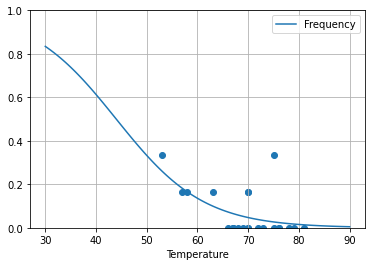

In [5]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept','Temperature']])
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

As expected from the initial data, the
temperature has no significant impact on the probability of failure of the
O-rings. It will be about 0.2, as in the tests
where we had a failure of at least one joint. Let's get back
to the initial dataset to estimate the probability of failure:

In [6]:
data = pd.read_csv("shuttle.csv")
print(np.sum(data.Malfunction)/np.sum(data.Count))

0.06521739130434782


This probability is thus about $p=0.065$. Knowing that there is
a primary and a secondary O-ring on each of the three parts of the
launcher, the probability of failure of both joints of a launcher
is $p^2 \approx 0.00425$. The probability of failure of any one of the
launchers is $1-(1-p^2)^3 \approx 1.2%$.  That would really be
bad luck.... Everything is under control, so the takeoff can happen
tomorrow as planned.

*it's very strange to compute the probability for 30 ° even tought we have no information about what would happen at that temperature, the lowest that we have is 57*

But the next day, the Challenger shuttle exploded and took away
with her the seven crew members. The public was shocked and in
the subsequent investigation, the reliability of the
O-rings was questioned. Beyond the internal communication problems
of NASA, which have a lot to do with this fiasco, the previous analysis
includes (at least) a small problem.... Can you find it?
You are free to modify this analysis and to look at this dataset
from all angles in order to to explain what's wrong.